# Gradientes de Sobel y Laplaciano para la detección de Bordes

### Importar librerías

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar la imagen

In [14]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

### Diccionario para los argumentos

In [15]:
args = {"imagen":"lapiceros.jpg"}

### Carga la imagen y la muestra

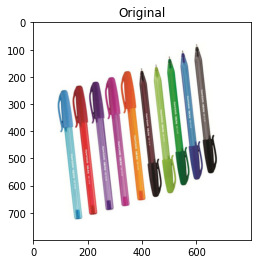

In [16]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

## Uso de gradientes para detectar bordes

Conviérte la imagen a escala de grises

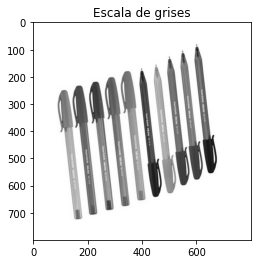

In [17]:
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
mostrar_imagen("Escala de grises",imagen)

Calcula el laplaciano de la imagen para determinar la gradiente.

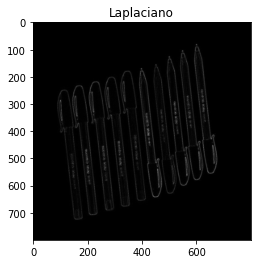

In [18]:
lap = cv2.Laplacian(imagen, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
mostrar_imagen("Laplaciano",lap)

Calcule gradientes a lo largo de los ejes X e Y, respectivamente

In [19]:
sobelX = cv2.Sobel(imagen, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(imagen, cv2.CV_64F, 0, 1)

In [20]:
sobelX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
sobelY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Las imágenes sobelX y sobelY ahora son del tipo de datos de punto flotante; debemos tener cuidado, al convertir de nuevo a un entero sin signo de
8 bits, de no perder ninguna imagen debido a valores de recorte fuera del rango de 0 a 255. Primero, tomamos el valor absoluto de la magnitud de
gradiente de las imágenes, LUEGO las convertimos de nuevo a enteros sin signo de 8 bits.

In [22]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

Podemos combinar las imagenes con gradiente de Sobel usando el operador OR a nivel de bits

In [23]:
sobelCombinado = cv2.bitwise_or(sobelX, sobelY)

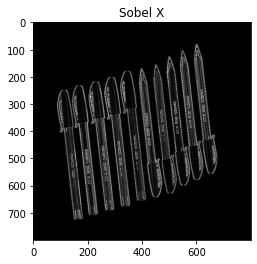

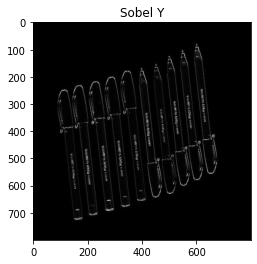

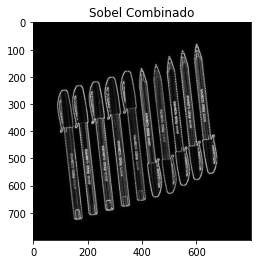

In [24]:
mostrar_imagen("Sobel X",sobelX)
mostrar_imagen("Sobel Y",sobelY)
mostrar_imagen("Sobel Combinado",sobelCombinado)